```
회귀 이해
```

통계적 측면에서 상관관계를 사용하여 두 정량 변수 간의 연관성을 나타냅니다. 즉 여러 자료들 간의 관계성을 수학적으로 추정 합니다.  

'개인소비는 무엇에 의존하고 있는가’, ‘물가 상승률을 결정하는 요인은 무엇인가’ 등과 같이 인과관계를 과거의 통계를 기초로 추정한 것입니다.



**이러한 관계를 회귀 방적식으로 나타낼수 있습니다**
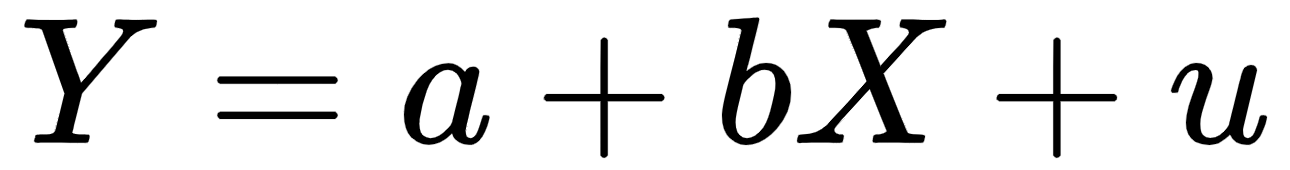
```
Y = 종속 변수(예측하려는 변수)입니다. 종종 결과 변수라고합니다.
X = 독립 변수(Y를 예측하는 데 사용하는 변수)입니다. 
a = Y축을 지나가는 회귀선의 지점 가로채기입니다.
b = 회귀선의 기울기, 경사입니다. 
u = 회귀선 예측 오차 입니다. (최소제곱법을 이용해 구함)
 ```
 
**회귀분석을 통해 다음을 알 수 있습니다.**
```
종속변수와 독립변수 간에 선형관계가 존재하는지 알 수 있습니다.
종속변수에 영향을 미치는 독립변수가 유의 한지와 영향력의 정도를 알 수 있습니다
추정된 회귀모형을 통해 종속변수의 예측치를 알 수 있습니다
```

**회귀 유형**
```
단순회귀분석(Simple Regression Analysis) : 
회귀모형의 형태에 따라 하나의 종속변수에 대해 독립변수가 하나인 경우를 단순회귀분석이라고 합니다.
직선을 사용해 두 변수 간의 관계를 정의합니다. 목표는 선을 정의하는 경사를 찾아서 데이터에 가장 가까운 선을 그리는것입니다.
```
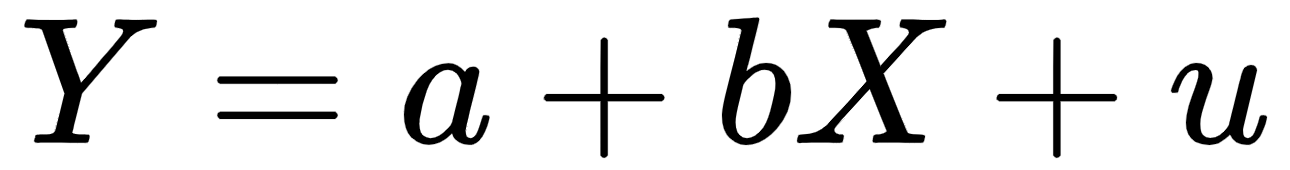

```
다중회귀분석(Multiple Regression Analysis):
반면에 하나의 종속변수에 대해 독립변수가 둘 이상인 경우를 다중회귀분석이라고합니다.
예측변인들이 2개 이상으로 하나의 결과변인을 도출하는 통계분석 기법
```
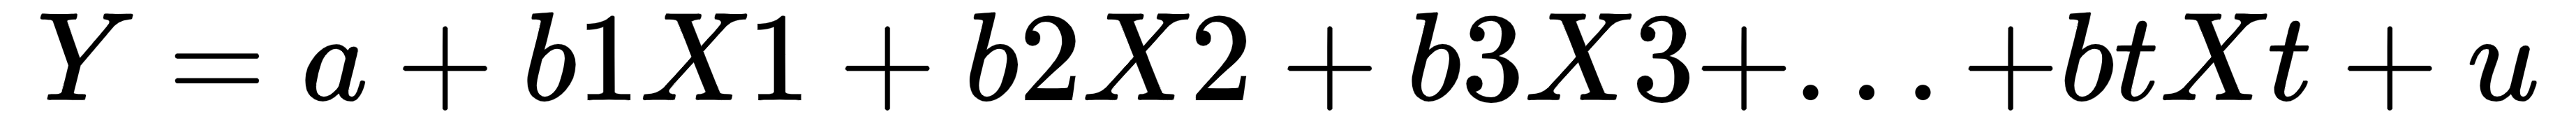

```
비선형회귀((Nonlinear regression)) : 
데이터가 모델을따라 수학 함수로 표현되는 회귀 분석의 유형입니다.
단순 선형회시는 직선함수를 가진 두 변수와 관련이 있는 반면 비선형 회귀는 곡선을 생성해야합니다.
```
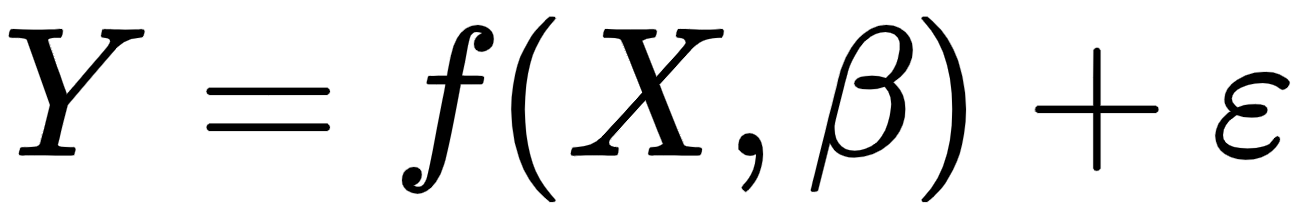
```
X = p 예측변수의 벡터
β = k 매개 변수의 벡터
f(-) = 알려진 회귀 함수
ε = 오류 용어
```



In [9]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm

boston = pd.read_csv("./sample_data/Boston.csv")
boston.head()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:

# 변수 설정
medv = boston[['medv']] # 집값
crim =  boston[['crim']]  # 범죄율
rm =  boston[['rm']] # 주택방 방수
lstat =  boston[['lstat']] # 인구 중 하위 계층 비율
# 우선 각각의 데이터를 데이터 프레임 형태로 하나하나의 변수에 저장합니다.
# 선형 회귀 모형(Y=B0+X*B1)에서 X행렬의 역할을 하게 됩니다.


crim1 = sm.add_constant(crim, has_constant="add")
# 옵션의 has_constant는 기존 행렬에 상수항이 있는지 여부를 적는 것인데,raise, add,skip을 사용가능하다.  
# "add"를 사용하면 상수 열이 있는 경우 1열의 열이 추가된다.


# statsmodels의 OLS를 이용하여 선형회귀모형을 적합시켜주면 됩니다.
# OLS를 이용하여 model1 이란 변수에 저장을 해주고 fit()을 꼭 이용하여 다시 저장해주어야 합니다
model1=sm.OLS(medv,crim1)
fitted_model1=model1.fit()

fitted_model1.summary()

# 선형 회귀 결과 Target=24.0331-0.4152*crim의 관계를 가지고 있다고 할 수 있습니다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           1.17e-19
Time:                        07:35:48   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
crim          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


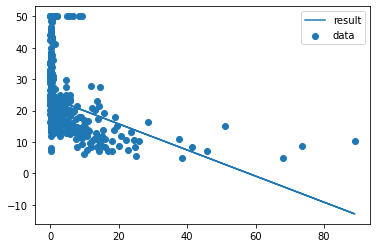

In [15]:
pred1=fitted_model1.predict(crim1)

import matplotlib.pyplot as plt
plt.yticks(fontname = "Arial")
plt.scatter(crim, medv, label="data")
plt.plot(crim,pred1, label="result")
plt.legend()
plt.show()